In [48]:
class Node:
    def __init__(self, id, x, y):
        self.Id = id
        self.X = x
        self.Y = y

    def __str__(self):
        return self.Id

    def __repr__(self):
        return str(self)

class Edge:
    def __init__(self, fromNode, toNode):
        self.FromNode = fromNode
        self.ToNode = toNode

    def __str__(self):
        return str(self.FromNode.Id) + '->' + str(self.ToNode.Id)

    def __repr__(self):
        return str(self)

def ParseNode(data):
    id = data[0]
    x = float(data[1])
    y = float(data[2])
    return Node(id, x, y)

def ParseEdge(data, nodesDict):
    idFrom = data[0]
    idTo = data[1]
    return Edge(nodesDict[idFrom], nodesDict[idTo])

file = open('Grids/rectangular_grid_graph_100x100.txt', 'r')
lines = file.readlines()
file.close()
nodes = {}
edges = []

for line in lines:
    data = line.split()
    if len(data) == 3:
        node = ParseNode(data)
        nodes[node.Id] = node
    elif len(data) == 2:
        edge = ParseEdge(data, nodes)
        edges.append(edge)

In [58]:
file = open('Paths/terrain_path_100x100.txt', 'r')
lines = file.readlines()
file.close()
path = []

for line in lines:
    data = line.split()
    node = ParseNode(data)
    path.append(node)

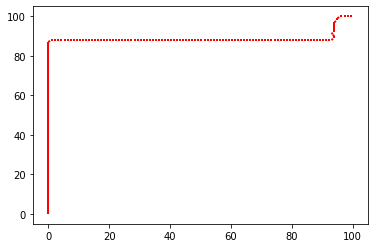

In [50]:
import matplotlib.pyplot as plt

# for edge in edges:
#     fromNode = edge.FromNode
#     toNode = edge.ToNode
#     plt.plot([edge.FromNode.X, edge.ToNode.X], [edge.FromNode.Y, edge.ToNode.Y], 'k-', alpha=0.1 )

for idx in range(0, len(path) - 1):
    plt.plot([path[idx].X, path[idx+1].X], [path[idx].Y, path[idx+1].Y], 'r:', linewidth=2)

plt.show()

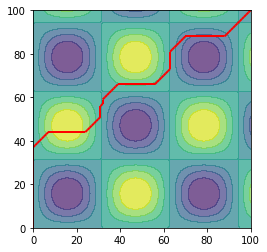

In [59]:
import math
import numpy as np

def GetHeight(xGrid, yGrid):
    #return np.cos(xGrid) * np.sin(yGrid) + 1
    return np.cos(xGrid/10+3.14/2) * np.sin(yGrid/10) + 1

stencil = np.arange(0, 101, 1)
Y, X = np.meshgrid(stencil, stencil)
Z = GetHeight(X, Y)

# for edge in edges:
#     fromNode = edge.FromNode
#     toNode = edge.ToNode
#     plt.plot([edge.FromNode.X, edge.ToNode.X], [edge.FromNode.Y, edge.ToNode.Y], 'k-', alpha=0.1 )

h = plt.contourf(X, Y, Z, alpha=0.7)
plt.axis('scaled')
#plt.colorbar()

for idx in range(0, len(path) - 1):
    plt.plot([path[idx].X, path[idx+1].X], [path[idx].Y, path[idx+1].Y], 'r--', linewidth=2)

plt.show()
